## Problem statement:
    
Learn how to approximate a function, if you are given its values at discrete points. 

Let's say we know the function's values at points $x_j$, namely $f(x_j)$. 

We can find an *approximation* to the function $f(x)$, by a function $p (x)$. We can decompose the function $p(x)$ into a set of basis functions $\phi(x)$, multiplied by some coefficients $c_k$:

$ p(x) = \sum_{k=0}^{n-1} c_k \phi_k(x)$.

We will assume that the $\phi_k$ are linearly independent.

There are two distinct approaches of figuring out the right form for $p(x)$:
- interpolation
- approximation

# Interpolation



In [12]:
import numpy as np
import matplotlib.pyplot as plt


## The data

For all methods below, let's assume we have data $x = {0, 2/3, 1}$ and $y = {1, 1/2, 0}$.

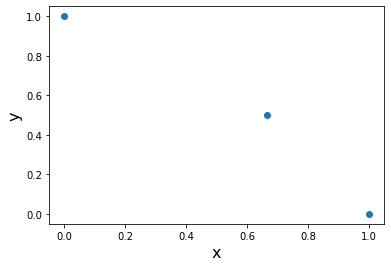

In [13]:
x = np.array([0, 2/3, 1])
y = np.array([1, 1/2, 0])

plt.scatter(x, y)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

We want to fit a polynomial of order 2 (i.e. three coefficients for three data points):

$$p(x) = c_0 + c_1 x + c_2 x^2$$

such that $p(x_i) = y_i$ for all $i, i = 0\ldots 2$.

Careful with the order of multiplication when combining `np.array` with `np.poly1d` objects:

## Polynomial interpolation via monomial basis functions

For our example we are getting the following system of equations

\begin{eqnarray}
c_0 + c_1 x_0 + c_2 x_0^2 = y_0 \\
c_0 + c_1 x_1 + c_2 x_1^2 = y_1 \\
c_0 + c_1 x_2 + c_2 x_2^2 = y_2
\end{eqnarray}

which can be written as a matrix equation involving the so called **Vandermonde** matrix:

$$\begin{pmatrix}
1 & x_0 & x_0^2 \\
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2  \end{pmatrix} 
\begin{pmatrix}c_0 \\ c_1 \\ c_2\end{pmatrix} =
\begin{pmatrix}y_0 \\ y_1 \\ y_2\end{pmatrix}
$$

So in our case:

$$\begin{pmatrix}
1 & 0 & 0 \\
1 & \frac{2}{3} & \frac{4}{9} \\
1 & 1 & 1  \end{pmatrix} 
\begin{pmatrix}c_0 \\ c_1 \\ c_2\end{pmatrix} =
\begin{pmatrix}1 \\ \frac{1}{2} \\ 0\end{pmatrix}
$$

We see immidiately that $c_0 = 1$ and we get a reduced $2\times 2$ system for the remaining coefficients $c_1$ and $c_2$.

$$\begin{pmatrix}
\frac{2}{3} & \frac{4}{9} \\
1 & 1  \end{pmatrix} 
\begin{pmatrix}c_1 \\ c_2\end{pmatrix} =
\begin{pmatrix}-\frac{1}{2} \\ -1\end{pmatrix}
$$

We can solve this by using Cramer's rule.

$$\begin{eqnarray}
D & = & \begin{vmatrix} \frac{2}{3} & \frac{4}{9} \\ 1 & 1 \end{vmatrix} & = & \frac{2}{3} - \frac{4}{9} & = & \frac{2}{9} \\
D_x & = & \begin{vmatrix} -\frac{1}{2} & \frac{4}{9} \\ -1 & 1 \end{vmatrix} & = & -\frac{1}{2} + \frac{4}{9} & = & -\frac{1}{18} \\
D_y & = & \begin{vmatrix} \frac{2}{3} & -\frac{1}{2} \\ 1 & -1 \end{vmatrix} & = & -\frac{2}{3} + \frac{1}{2} & = & -\frac{1}{6}
\end{eqnarray}$$

$$\begin{eqnarray}
c_1 & = & \frac{D_x}{D} & = & -\frac{1}{18} \cdot \frac{9}{2} & = & -\frac{1}{4} \\
c_2 & = & \frac{D_y}{D} & = & -\frac{1}{6} \cdot \frac{9}{2}  & = & -\frac{3}{4}
\end{eqnarray}$$

And therefore our interpolating polynomial is

$$p(x) = c_2 x^2 + c_1 x + c_0 = -\frac{3}{4}x^2 -\frac{1}{4} x + 1$$

In [17]:
np.vander?

In [28]:
v_x = np.vander(x)

# solve the system
sol = np.linalg.solve(v_x,y)

# Construct a polynomial from the solution
p = np.poly1d(sol)
print(p)

       2
-0.75 x - 0.25 x + 1


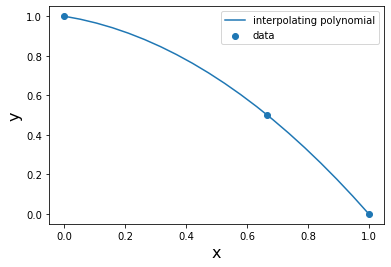

In [29]:
x = np.array([0, 2/3, 1])
y = np.array([1, 1/2, 0])

plt.scatter(x, y, label = 'data')

# points to evaluate the polynomial for plotting
xarr = np.linspace(0,1,20)


plt.plot(xarr, p(xarr), label = 'interpolating polynomial')
plt.legend()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()


### Excursion: numpy's poly1d objects

> Polynomials can be represented by `np.poly1d` objects. 
> These will allow easy addition, multiplication and derivation.

In [82]:
# example: calculate the polynomial (x-x0)*(x-x1)*(x-x2)*(x-x3)*(x-x4) for five random x0...x4

xi = np.random.random(5)
pp = np.poly1d(1.0)
pp = 1.0
for xii in xi:
    pp *= np.poly1d([1, -xii])
print(pp)
print(pp.deriv(5))     # this should be 5! = 120

# equivalently:
pp = np.poly1d(xi,r=True)
print(pp)

   5         4        3          2
1 x - 2.168 x + 1.72 x - 0.6225 x + 0.1008 x - 0.00562
 
120
   5         4        3          2
1 x - 2.168 x + 1.72 x - 0.6225 x + 0.1008 x - 0.00562


In [15]:
np.array([3, 2])*np.poly1d([1,2])  # this will turn the coefficients into an array and multiply elements

array([3, 4])

In [16]:
np.poly1d([1,2])*np.array([3, 2])  # this will turn the np.array into another polynomial...

poly1d([3, 8, 4])

## Polynomial interpolation using Lagrange polynomials

Next we choose our basis functions to be the Lagrange polynomials: 
\begin{equation}
L_k(x) = \frac{\Pi_{j=0,j\neq k}^{n-1} (x-x_j)}{\Pi_{j=0,j\neq k}^{n-1}(x_k - x_j}, \,\,\, k = 0,1,...n-1
\end{equation}

Recall that (x_j,y_j) are our data points.
The denominator is thus a constant, it does not depend on x. The numerator is a polynomial of degree n-1 in x. The Lagrange polynomial $L_k(x)$ is 1 at $x_k$ and is zero at all points other $x_j, j\neq k$. Namely: 
\begin{equation}
L_k(x_j) = \delta_{kj}
\end{equation}
where $\delta_{kj}$ is the Kroenecker delta.



For 3 data points $x_0, x_1, x_2$, the Lagrange polynomials are:
\begin{equation}
L_0(x) = \frac{(x-x_1)(x-x_2)}{(x_0 - x_1)(x_0-x_2)}\\
L_1(x) = \frac{(x-x_0)(x-x_2)}{(x_1 - x_0)(x_1-x_2)}\\
L_2(x) = \frac{(x-x_0)(x-x_1)}{(x_2 - x_0)(x_2-x_1)}\\
\end{equation}

Our interpolating polynomial for n data points is:
\begin{equation}
p(x) = \sum_{k=0}^{n-1} y_k L_k(x)
\end{equation}

you can verify that this indeed goes through the data points ($x_j, y_j$).

Let's see what the interpolating polynomial is for our example data points.

$$\begin{eqnarray}
p(x) & = & y_0\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + y_1\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_0-x_2)} + y_2\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} \\
& = & 1\frac{(x-\frac{2}{3})(x-1)}{(0-\frac{2}{3})(0-1)} + \frac{1}{2}\frac{(x-0)(x-1)}{(\frac{2}{3}-0)(\frac{2}{3}-1)} + 0\frac{(x-0)(x-\frac{2}{3})}{(1-0)(1-\frac{2}{3})} \\
& = & \frac{3}{2}(x-\frac{2}{3})(x-1) - \frac{9}{4} x (x-1) \\
& = & (\frac{3}{2}-\frac{9}{4}) x^2 - (1+\frac{3}{2}-\frac{9}{4}) x + 1 \\
& = & -\frac{3}{4} x^2 - \frac{1}{4} x + 1
\end{eqnarray}$$  

In [76]:
print(x,y)
L0 = np.poly1d((1,-x[1]))*np.poly1d((1,-x[2]))*y[0]/((x[0]-x[1])*(x[0]-x[2]))
L1 = np.poly1d((1,-x[0]))*np.poly1d((1,-x[2]))*y[1]/((x[1]-x[0])*(x[1]-x[2]))
L2 = np.poly1d((1,-x[0]))*np.poly1d((1,-x[1]))*y[2]/((x[2]-x[0])*(x[2]-x[1]))

pL =  L0+L1+L2
print(pL)

[0.         0.66666667 1.        ] [1.  0.5 0. ]
       2
-0.75 x - 0.25 x + 1


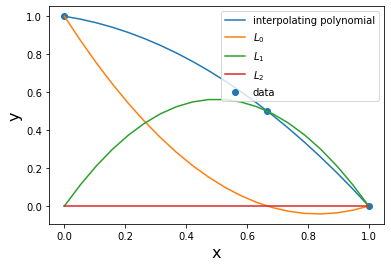

In [80]:
plt.scatter(x, y, label = 'data')

# points to evaluate the polynomial for plotting
xarr = np.linspace(0,1,20)


#plt.plot(xarr, p(xarr), label = 'interpolating polynomial 1')

plt.plot(xarr, pL(xarr), label = 'interpolating polynomial')

# individual Lagrange polynomials
plt.plot(xarr, L0(xarr), label = '$L_0$')
plt.plot(xarr, L1(xarr), label = '$L_1$')
plt.plot(xarr, L2(xarr), label = '$L_2$')

plt.legend()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

Both methods, however can have large errors when high-degree polynomials are needed, depending on the exact placement of the grid points. Check out this example:

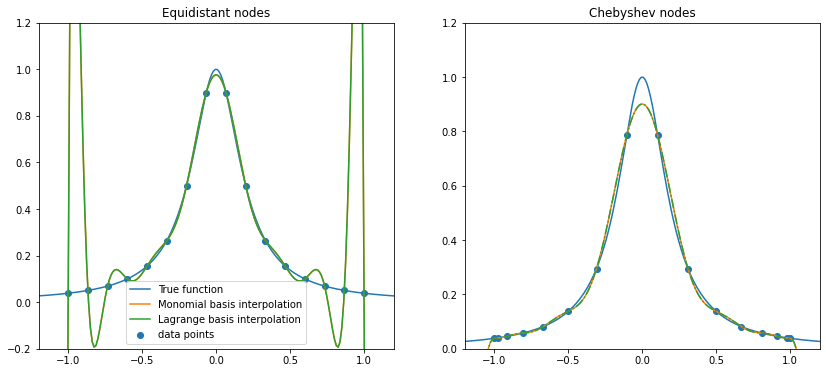

In [70]:
N = 16

# Generate the x data
x = np.linspace(-1, 1,N)

# The underlying function we wish to approximate
def f(x):
    return 1/(1 + 25*x*x)

# Generate the y data
y = f(x)

# Vandermode
v_x = np.vander(x)
# solve the system
sol = np.linalg.solve(v_x,y)
# Construct a polynomial from the solution
p = np.poly1d(sol)


# Lagrange
from scipy.interpolate import lagrange
poly = lagrange(x, y) # WARNING! THIS FUNCTIONALITY IS UNSTABLE - DO NOT USE FOR MORE THAN ~20 POINTS


fig, ax = plt.subplots(ncols = 2, figsize = (14,6))

z = np.linspace(-np.pi, np.pi, 500)
ax[0].plot(z, f(z), label = 'True function')

ax[0].plot(z, p(z), label = 'Monomial basis interpolation')

ax[0].plot(z, poly(z), label = 'Lagrange basis interpolation')

ax[0].scatter(x, y, label = 'data points')
ax[0].set_ylim(-0.2, 1.2)
ax[0].set_xlim(-1.2,1.2)
ax[0].set_title('Equidistant nodes')
ax[0].legend()

# Repeat with different grid points (Chebyshev)
a = np.arange(0, N)*np.pi/(N-1)
x = -np.cos(a)
# Generate the y data
y = f(x)
# Vandermode
v_x = np.vander(x)
# solve the system
sol = np.linalg.solve(v_x,y)
# Construct a polynomial from the solution
p = np.poly1d(sol)
# Lagrange
poly = lagrange(x, y) # WARNING! THIS FUNCTIONALITY IS UNSTABLE - DO NOT USE FOR MORE THAN ~20 POINTS


ax[1].plot(z, f(z), label = 'True function')

ax[1].plot(z, p(z), ls = '-', label = 'Monomial basis interpolation')

ax[1].plot(z, poly(z), ls = '-.' , label = 'Lagrange basis interpolation')

ax[1].scatter(x, y, label = 'data points')
ax[1].set_ylim(0, 1.2)
ax[1].set_xlim(-1.2,1.2)
ax[1].set_title('Chebyshev nodes')
plt.show()

## Approximation Error Theorem

The error associated with approximating a function $f(x) \in C^{n}[a, b]$ with a polynomial that interpolates $f$ at $n$ distinct points in $[a, b]$ is given by

$$f(x) = p(x) + E_n(x)$$

where the error $E_n(x)$ can be shown to have the form:

$$E_n(x) = (x − x_0)(x − x_1) \ldots (x − x_{n-1})\frac{f^{(n)}(\xi)}{n!}$$

and where $\xi \in [a, b]$ and depends on $x$.

*Proof:* If $x = x_i$ for some $i$ this is true because both sides = 0. Assume that $x^\prime \ne x_i$ for $i=0\ldots n-1$. Define 

$$w(t) = \prod_{i=0}^{n-1} (t-x_i)$$

which is called the node polynomial and which vanishes at all $x_i$. 
But notice that $w(x^\prime) \ne 0$. We can now define 

$$F(x) = f(x)-p(x)-K w(x)$$

Which is a function equal to zero at all $x_i$. And by choosing 

$$K = \frac{f(x^\prime)-p(x^\prime)}{w(x^\prime)}$$

we get an additional zero at $x^\prime$.

In total we then have that $F(x) = 0$ at $n+1$ values of $x$, namely at $x_i, i=0\ldots n-1$ and at $x^\prime$. By Rolle's theorem we therefore have that $F^{(n)}(x) = 0$ at one point, call it $\xi$. Now, because 
$p^{(n)}(x) = 0$ and $w^{(n)} = n!$ we have:

$$F^{(n)}(\xi) = f^{(n)}(\xi) - K n! = 0$$

Recalling the value of $K$ and solving for $f(x^\prime)-p(x^\prime)$ we have that the error in the approximation of $f(x)$ with a polynomial of degree $n-1$ is

$$E_n(x^\prime) := f(x^\prime) - p(x^\prime) = \frac{f^{(n)}(\xi)}{n!} \prod_{i=0}^{n-1} (x^\prime-x_i)
= (x^\prime − x_0)(x^\prime − x_1) \ldots (x^\prime − x_{n-1})\frac{f^{(n)}(\xi)}{n!} $$

## Chebyshev nodes

The previous result shows that we can influence the error in the approximation by carefully chosing the points of
interpolation $x_i, i=0\ldots n-1$. 
It turns out (without proof) that the best choice is (scaled versions of) **Chebyshev nodes**.

In the special case that $x \in [-1, 1]$ these are

$$x_i = \cos\left(\frac{2i+1}{2n}\right) \quad {\rm for} \quad i=0\ldots n-1$$

If we are dealing with a different interval $[a, b]$ instead of $[−1, 1]$ we make the transformation:

$$t_i = \frac{1}{2}(a+b) + \frac{1}{2}(a-b) (x_i)$$

The following plot shows how the Chebyshev nodes can be found by distributing points regularyly on a semi-circle (blue points) and then projecting them down onto the x-axis. The green points are the Chebyshev nodes for the interval [-1, 1] in the case of n = 10.

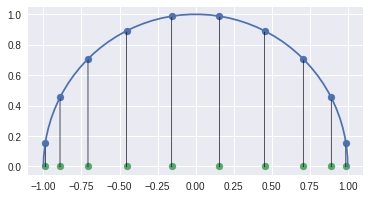

In [15]:
N = 10
a = np.linspace(0, np.pi)

t = np.cos(a)
s = np.sin(a)

xi = np.cos(np.pi*(2*np.arange(N)+1)/(2*N))
yi = np.sin(np.pi*(2*np.arange(N)+1)/(2*N))
y0 = np.zeros(xi.shape)

plt.plot(t, s)
plt.scatter(xi, yi)
plt.scatter(xi, y0)
for xx, yy, yy0 in zip(xi, yi, y0):
    plt.arrow(xx, yy, 0.0, yy0-yy)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

## Cubic spline interpolation

Idea: fit every pair of neighbouring points with a cubic polynomial. Choose coefficients such that first and second derivatives agree at the interfaces.

Example with three pairs of $x, y$ coordinates. We get four equations to fit $y_0, y_1$ with two cubic polynomials (splines):

$$\begin{eqnarray}
c_0 x_0^3 + c_1 x_0^2 + c_2 x_0 + c_3 & = & y_0 \\
c_0 x_1^3 + c_1 x_1^2 + c_2 x_1 + c_3 & = & y_1 \\
d_0 x_1^3 + d_1 x_1^2 + d_2 x_1 + d_3 & = & y_1 \\
d_0 x_2^3 + d_1 x_2^2 + d_2 x_2 + d_3 & = & y_2 \\
\end{eqnarray}$$

Continuous first and second derivatives at $x_1$:

$$\begin{eqnarray}
3 c_0 x_1^2 + 1 c_1 x_1 + c_2  & = & 3 d_0 x_1^2 + 2 d_1 x_1 + d_2 \\
6 c_0 x_1 + 2 c_1  & = & 6 d_0 x_1 + 2 d_1 \\
\end{eqnarray}$$

Make second derivatives disappear at extreme points:

$$\begin{eqnarray}
6 c_0 x_0 + 2 c_1  & = 0 \\
6 d_0 x_2 + 2 d_1  & = 0 \\
\end{eqnarray}$$

The resulting system of equations:

$$\begin{pmatrix}
x_0^3 & x_0^2 & x_0 & 1& 0 & 0 & 0 & 0 \\
x_1^3 & x_1^2 & x_1 & 1& 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & x_1^3 & x_1^2 & x_1 & 1 \\
0 & 0 & 0 & 0 & x_2^3 & x_2^2 & x_2 & 1 \\
3 x_1^2 & 2 x_1 & 1 & 0 & -3 x_1^2 & -2 x_1 & -1 & 0 \\
6 x_1 & 2 & 0 & 0 & -6 x_1 & -2 & 0 & 0 \\
6 x_0 & 2 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 6 x_2 & 2 & 0 & 0 \\
\end{pmatrix}
\begin{pmatrix}
c_0 \\ c_1 \\ c_2 \\ c_3 \\ d_0 \\ d_1 \\ d_2 \\ d_3 \\
\end{pmatrix} = 
\begin{pmatrix}
y_0 \\ y_1 \\ y_2 \\ y_3 \\ 0 \\ 0 \\ 0 \\ 0 \\
\end{pmatrix}$$

In [83]:
x = np.array([0, 2/3, 1])
y = np.array([1, 1/2, 0])

M = np.array([  x[0]**3, x[0]**2, x[0],   1,          0,       0,    0,   0,
                x[1]**3, x[1]**2, x[1],   1,          0,       0,    0,   0,
                      0,       0,    0,   0,    x[1]**3, x[1]**2, x[1],   1,
                      0,       0,    0,   0,    x[2]**3, x[2]**2, x[2],   1,
              3*x[1]**2,  2*x[1],    1,   0, -3*x[1]**2, -2*x[1],   -1,   0,
                 6*x[1],       2,    0,   0,    -6*x[1],      -2,    0,   0,
                 6*x[0],       2,    0,   0,          0,       0,    0,   0,
                      0,       0,    0,   0,     6*x[2],       2,    0,   0 ]).reshape((8,8))

b = np.array([y[0], y[1], y[1],y[2], 0, 0, 0, 0])
M

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.2962963 ,  0.44444444,  0.66666667,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2962963 ,
         0.44444444,  0.66666667,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  1.        ,  1.        ],
       [ 1.33333333,  1.33333333,  1.        ,  0.        , -1.33333333,
        -1.33333333, -1.        ,  0.        ],
       [ 4.        ,  2.        ,  0.        ,  0.        , -4.        ,
        -2.        ,  0.        ,  0.        ],
       [ 0.        ,  2.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  6.        ,
         2.        ,  0.        ,  0.        ]])

In [84]:
coeffs = np.linalg.solve(M, b)
p1 = np.poly1d(coeffs[0:4])
p2 = np.poly1d(coeffs[4:8])
print(p1)
print()
print(p2)

         3
-0.5625 x - 0.5 x + 1

       3         2
1.125 x - 3.375 x + 1.75 x + 0.5


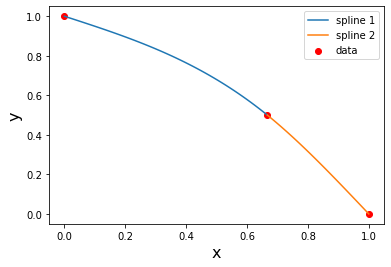

In [73]:
# fig, axs = plt.subplots(3,1, figsize=(8, 12))
t1 = np.linspace(x[0], x[1])
t2 = np.linspace(x[1], x[2])

plt.scatter(x, y, color='red', label='data')
plt.plot(t1, p1(t1), label='spline 1')
plt.plot(t2, p2(t2), label='spline 2')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend()
plt.show()

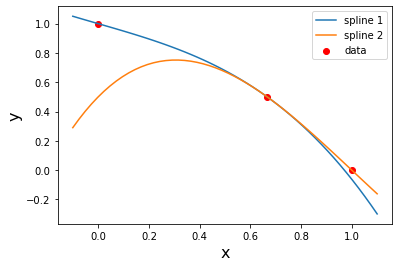

In [74]:
t1 = np.linspace(x[0]-0.1, x[2]+0.1)
t2 = np.linspace(x[0]-0.1, x[2]+0.1)
plt.scatter(x, y, color='red', label='data')
plt.plot(t1, p1(t1), label='spline 1')
plt.plot(t2, p2(t2), label='spline 2')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend()
plt.show()

# Approximation

## Approximation with linear models

We have $m$ data points $x_i, y_i, i = 0\ldots m-1$ and want to approximate the relation between $x$ and $y$ 
with a linear combination of $n$ functions $f_k, k = 0\ldots n-1$:

$$y_i = c_0 f_0(x_i) + c_1 f_1(x_i) + \ldots c_{n-1} f_{n-1}(x_i)$$

We assume that $m > n$, i.e. we have more data points than functions. *Compare with the interpolation case, 
when $m = n$!*

> Note, that the relation between $y$ and $x$ is **linear in the coefficients** $c_k$, not in $x$!

### Example: fitting a straight line

$$y_i = c_0 \cdot 1 + c_1 \cdot x_i = c_0 + c_1 x_i$$

So here $f_0 = 1$ and $f_1 = x$. 

We want to find the coefficients $c_0, c_1$ which minimize the quadratic deviations
("least squares"):

$$\min_{c_0,c_1} \cal{F(c_0, c_1)} = \min_{c_0,c_1}\sum_{i=0}^{m-1} \big(y_i - (c_0 + c_1 x_i)\big)^2$$

We can find that minimum by differentiating with respect to $c_0$ and $c_1$ and setting the derivatives equal to zero:

\begin{eqnarray}
0 = \frac{\partial \cal{F}}{\partial c_0} & = & \sum_{i=0}^{m-1} 2\big(y_i - (c_0 + c_1 x_i) \big) \\
0 = \frac{\partial \cal{F}}{\partial c_1} & = & \sum_{i=0}^{m-1} 2\big(y_i - (c_0 + c_1 x_i) x_i \big)
\end{eqnarray}

Taking constants out of the sum and sorting terms, we get:

$$\begin{pmatrix}
\sum 1 & \sum x_i \\
\sum x_i & \sum x_i^2
\end{pmatrix}  
\begin{pmatrix}
c_0 \\
c_1
\end{pmatrix} = 
\begin{pmatrix}
\sum y_i \\
\sum x_i y_i
\end{pmatrix}
$$

Which is a system of linear equations, which can easily be solved to get $c_0$ and $c_1$.

Note, that the matrix 
$$\mathbf{A} = \begin{pmatrix}
\sum 1 & \sum x_i \\
\sum x_i & \sum x_i^2
\end{pmatrix}$$

can be written as 

$$\mathbf{A} = \mathbf{D}^{\mathsf{T}} \mathbf{D}, \quad {\rm where} \quad \mathbf{D} = 
\begin{pmatrix}
1 & x_0 \\
1 & x_1 \\
\vdots & \vdots \\
1 & x_{m-1}
\end{pmatrix}$$

and where $\mathbf{D}$ is the design matrix of this problem, which in this case is the Vandermonde matrix we have used for interpolation before. However, we are only using the first $n$ columns of the Vandermonde matrix, 
where $n$ is the order of the polynomial we want to fit.

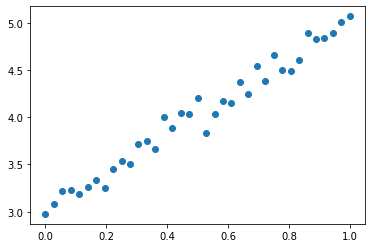

array([3.01861857, 2.00966428])

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

M = 37
x = np.linspace(0.0, 1.0, M)
y = 2.0*x + 3.0 + 0.1*np.random.randn(M)
plt.scatter(x, y)
plt.show()

D = np.zeros((M, 2))
D[:, 0] = np.ones(M)
D[:, 1] = x

A = np.transpose(D) @ D
b = np.transpose(D) @ y
c = np.linalg.solve(A, b)
c                            # we expect [c[0] = 2.0, c[1] = 3.0]

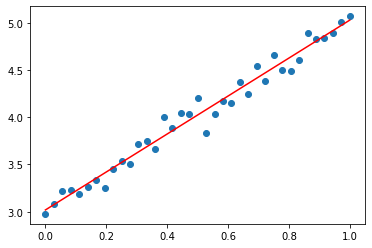

In [5]:
plt.scatter(x, y)
plt.plot(x, c[1]*x + c[0], color='red')
plt.show()

## General case

It turns out, that in the general case

$$y_i = c_0 f_0(x_i) + c_1 f_1(x_i) + \ldots c_{n-1} f_{n-1}(x_i)$$

you will simply have to calculate your design matrix as 

$$\mathbf{D} = 
\begin{pmatrix}
f_0(x_0) & f_1(x_0) & \ldots & f_n{x_0} \\
f_0(x_1) & f_1(x_1) & \ldots & f_n{x_1} \\
\vdots & \vdots & \ddots & \vdots \\
f_0(x_{m-1}) & f_1(x_{m-1}) & \ldots & f_n{x_{m-1}}
\end{pmatrix}$$


### Example 2: fitting a sinusoidal function

$$y_i = a \cos(x_i + \phi)$$

with two parameters $a$ and $\phi$. But that relation is **not** linear in the parameter $\phi$, so we rewrite the equation as

$$y_i = a \big(\cos x_i \cos \phi - \sin x_i \sin \phi \big) = (a\cos \phi)\cos x_i - (a\sin\phi)\sin x_i$$

So our design matrix becomes

$$\mathbf{D} = 
\begin{pmatrix}
\cos x_0 & \sin x_0 \\
\cos x_1 & \sin x_1 \\
\vdots & \vdots \\
\cos x_{m-1} & \sin x_{m-1}
\end{pmatrix}$$

and we are fitting the two coefficients $c_0 = a\cos \phi$ and $c_1 = -a \sin \phi$, from which we can recover $a$ and $\phi$ as:

$$a = \sqrt{c_0^2 + c_1^2} \quad {\rm and} \quad \phi = \arctan\frac{-c_1}{c_0}$$

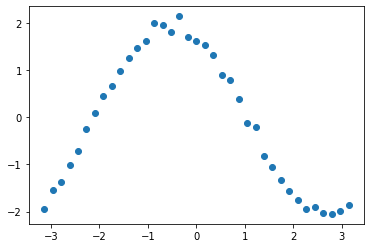

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

M = 37
x = np.linspace(-np.pi, np.pi, M)
y = 2.0*np.cos(x + math.radians(30.0)) + 0.1*np.random.randn(M)
plt.scatter(x, y)
plt.show()

D = np.zeros((M, 2))
D[:, 0] = np.cos(x)
D[:, 1] = np.sin(x)

In [7]:
A = np.transpose(D) @ D
b = np.transpose(D) @ y
c = np.linalg.solve(A, b)
c

array([ 1.74012047, -1.01149002])

In [8]:
a = np.sqrt(c[0]**2 + c[1]**2)
print(a)  

2.0127422372665333


In [9]:
phi = math.degrees(np.arctan2(-c[1], c[0]))
print(phi)                      # we expect 30 deg

30.1684030248851


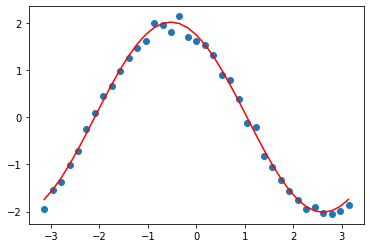

In [10]:
plt.scatter(x, y)
plt.plot(x, a*np.cos(x + math.radians(phi)), color='red')
plt.show()